# Project

# Student Name: Hung Yi-Le

# GITHUB: ZackLa

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from collections import Counter

# 1. Text Classification
## It is highly recommended that you complete this project using Keras1 and Python.
# (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.


In [2]:
import glob
from nltk.tokenize import RegexpTokenizer
import string
from string import digits
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
t  = Tokenizer()

# (b) Data Exploration and Pre-processing


## i. You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments.

## ii. The data are pretty clean. Remove the punctuation and numbers from the data.

In [4]:
positive = {}
negative = {}

In [5]:
def sort_dict_by_value(d, reverse = False):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

In [6]:
os.chdir('../data/pos')
pos_files = glob.glob('*.txt')
#sort all the txt file from 001 up to certain number in order
pos_files = sorted(pos_files, key=lambda name: int(name[2:5])) 

In [7]:
df_specific_word = {}
count = []
len_word = []
tokenized = {}
dd = {}
for file in pos_files:
    with open(file) as f:
        d = {}
        
        #read the whole txt file content
        lines = f.readlines()
        #remove all the punctuation
        lines = [''.join(letter for letter in line if letter not in string.punctuation) for line in lines]
        #remove all the numbers
        lines = [''.join(letter for letter in line if letter not in string.digits) for line in lines]
        data = []
        data2 = []
        #remove all the \n
        for x in lines:
            data2.append(x.replace("\n", ""))
        data = "".join(data2)
        
        #assign in a dic
        positive[file] = data
        
        #append the length of the words in a list
        len_word.append(len(data.split()))
        
        #read all the unique word in the whole txt file
        words = set(data.split())
        #count all the unique word in the list
        count.append(len(words))
        
        data1 = data.split()
        
#         t.fit_on_texts(data2)
#         tokenized[file] = t.texts_to_sequences(data2)
#         dd[file] = t.word_index
        
        
        #make all the word into lowercase
        data1 = [x.lower() for x in data1]
        for word in data1:
            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
        d = sort_dict_by_value(d, True)
        #for specific word counted
        df1_1 = pd.Series(d.values(), index = d.keys())
        df1_1 = pd.DataFrame(df1_1)
        df_specific_word[file] = df1_1
        

In [8]:
df = pd.Series(positive.values(), index = positive.keys())
df = pd.DataFrame(df)
df['class'] = '1'
df['number of unique words'] = count
df['review_length'] = len_word

In [9]:
df

,0,class,number of unique words,review_length
cv000_29590.txt,films adapted from comic books have had plenty...,1,411,679
cv001_18431.txt,every now and then a movie comes along from a ...,1,311,650
cv002_15918.txt,youve got mail works alot better than it deser...,1,243,416
cv003_11664.txt,jaws is a rare film that grabs your attenti...,1,496,997
cv004_11636.txt,moviemaking is a lot like being the general ma...,1,341,644
...,...,...,...,...
cv995_21821.txt,wow what a movie its everything a movie can ...,1,314,760
cv996_11592.txt,richard gere can be a commanding actor but he...,1,196,320
cv997_5046.txt,glorystarring matthew broderick denzel washin...,1,510,1050
cv998_14111.txt,steven spielbergs second epic film on world wa...,1,269,583


In [10]:
os.chdir('../neg')
neg_files = glob.glob('*.txt')
#sort all the txt file from 001 up to certain number in order
neg_files = sorted(neg_files, key=lambda name: int(name[2:5]))

In [11]:
## get the current working directory
path = os.getcwd()
path

'/Users/charlieblah/Desktop/School/Spring 2022/DSCI552/HW/Project/data/neg'

In [12]:
df_specific_word1 = {}
count1 = []
len_word1 = []
tokenized1 = {}
dd1 = {}
for file in neg_files:
    with open(file) as f:
        d1 = {}
        #read the whole txt file content
        lines = f.readlines()
    
        #remove all the punctuation
        lines = [''.join(letter for letter in line if letter not in string.punctuation) for line in lines]
        #remove all the numbers
        lines = [''.join(letter for letter in line if letter not in string.digits) for line in lines]
        data = []
        data2 = []
        
        for  x in lines:
            data2.append(x.replace("\n", ""))
        data = "".join(data2)
        #assign in a dic
        negative[file] = data
        #append the length of the words in a list
        len_word1.append(len(data.split()))
        
        #read all the unique word in the whole txt file
        words = set(data.split())
        #count all hte unique word in the list
        count1.append(len(words))
        
        data1 = data.split()
        
#         t.fit_on_texts(data2)
#         tokenized1[file] = t.texts_to_sequences(data2)
#         dd1[file] = t.word_index
        
        #make all the word into lowercase
        data1 = [x.lower() for x in data1]
        for word in data1:
            if word in d1:
                d1[word] = d1[word] + 1
            else:
                d1[word] = 1
        d1 = sort_dict_by_value(d1, True)
        #for specific word counted
        df1_1 = pd.Series(d1.values(), index = d1.keys())
        df1_1 = pd.DataFrame(df1_1)
        df_specific_word1[file] = df1_1

In [13]:
df1 = pd.Series(negative.values(), index = negative.keys())
df1 = pd.DataFrame(df1)
df1['class'] = '0'
df1['number of unique words'] = count1
df1['review_length'] = len_word1

In [14]:
df1

,0,class,number of unique words,review_length
cv000_29416.txt,plot two teen couples go to a church party d...,0,332,688
cv001_19502.txt,the happy bastards quick movie review damn tha...,0,151,240
cv002_17424.txt,it is movies like these that make a jaded movi...,0,268,483
cv003_12683.txt,quest for camelot is warner bros first fe...,0,303,462
cv004_12641.txt,synopsis a mentally unstable man undergoing p...,0,371,718
...,...,...,...,...
cv995_23113.txt,if anything stigmata should be taken as a w...,0,575,1366
cv996_12447.txt,john boormans zardoz is a goofy cinematic de...,0,507,1009
cv997_5152.txt,the kids in the hall are an acquired taste it...,0,236,396
cv998_15691.txt,there was a time when john carpenter was a gre...,0,281,521


## iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.


In [15]:
train = pd.DataFrame()
train = pd.concat([train, df[0:700]])
train = pd.concat([train, df1[0:700]])
test = pd.DataFrame()
test = pd.concat([test, df[700:1000]])
test = pd.concat([test, df1[700:1000]])

### Train and test data are seperated as above

In [16]:
texts = ""
for i in train[0]:
    texts = texts + i

In [17]:
t.fit_on_texts([texts])
tokenized = t.texts_to_sequences([texts])
tokenized_P = t.word_index

In [18]:
os.chdir('../pos')
neg_files = glob.glob('*.txt')

In [19]:
tokenized1 = {}
dd = {}
for file in pos_files:
    with open(file) as f:
        d = {}
        
        #read the whole txt file content
        lines = f.readlines()
        #remove all the punctuation
        lines = [''.join(letter for letter in line if letter not in string.punctuation) for line in lines]
        #remove all the numbers
        lines = [''.join(letter for letter in line if letter not in string.digits) for line in lines]
        data = []
        data2 = []
        #remove all the \n
        for x in lines:
            data2.append(x.replace("\n", ""))
            
        tokenized1[file] = t.texts_to_sequences(data2)

In [20]:
df = pd.Series(tokenized1.values(), index = positive.keys())
df = pd.DataFrame(df)
df['class'] = '1'
df['number of unique words'] = count
df['review_length'] = len_word

In [21]:
df

,0,class,number of unique words,review_length
cv000_29590.txt,"[[66, 3436, 31, 344, 1573, 32, 90, 1069, 4, 61...",1,411,679
cv001_18431.txt,"[[149, 141, 3, 97, 2, 28, 200, 256, 31, 2, 157...",1,311,650
cv002_15918.txt,"[[715, 287, 4181, 376, 10591, 155, 59, 9, 1168...",1,243,416
cv003_11664.txt,"[[2677, 6, 2, 1520, 15, 8, 5604, 164, 565, 145...",1,496,997
cv004_11636.txt,"[[5346, 6, 2, 207, 38, 112, 1, 835, 2680, 4, 2...",1,341,644
...,...,...,...,...
cv995_21821.txt,"[[3582, 47, 2, 28], [22, 289, 2, 28, 64, 23, 1...",1,314,760
cv996_11592.txt,"[[871, 4725, 64, 23, 2, 3871, 265, 16, 122, 26...",1,196,320
cv997_5046.txt,"[[1294, 2924, 4064, 1841, 3, 3600, 1, 367, 67,...",1,510,1050
cv998_14111.txt,"[[1044, 4564, 339, 1470, 15, 19, 143, 381, 944...",1,269,583


In [22]:
os.chdir('../neg')
neg_files = glob.glob('*.txt')

In [23]:
tokenized2 = {}
dd = {}
for file in neg_files:
    with open(file) as f:
        d = {}
        
        #read the whole txt file content
        lines = f.readlines()
        #remove all the punctuation
        lines = [''.join(letter for letter in line if letter not in string.punctuation) for line in lines]
        #remove all the numbers
        lines = [''.join(letter for letter in line if letter not in string.digits) for line in lines]
        data = []
        data2 = []
        #remove all the \n
        for x in lines:
            data2.append(x.replace("\n", ""))
            
        tokenized2[file] = t.texts_to_sequences(data2)

In [24]:
df1 = pd.Series(tokenized2.values(), index = negative.keys())
df1 = pd.DataFrame(df1)
df1['class'] = '0'
df1['number of unique words'] = count1
df1['review_length'] = len_word1

In [25]:
df1

,0,class,number of unique words,review_length
cv000_29416.txt,"[[104, 104], [104], [8, 25, 651, 132, 5, 262, ...",0,332,688
cv001_19502.txt,"[[170, 9, 1, 1784, 1656, 4, 2, 107, 1111, 1052...",0,151,240
cv002_17424.txt,"[[6776, 6, 26, 2, 28, 9, 6, 2, 33601, 15574, 1...",0,268,483
cv003_12683.txt,"[[22648, 1, 1722, 340], [119, 1789, 1, 4974], ...",0,303,462
cv004_12641.txt,"[[43, 518, 4700, 368, 218, 1053, 211, 82, 3038...",0,371,718
...,...,...,...,...
cv995_23113.txt,"[[1779, 43, 2, 11995, 33645, 7, 1, 4812, 2215,...",0,575,1366
cv996_12447.txt,"[[22, 141, 1, 7222, 4, 1, 32790, 4, 1323, 297,...",0,507,1009
cv997_5152.txt,"[[32769, 11, 1, 14410, 3603, 4, 107, 8, 628, 1...",0,236,396
cv998_15691.txt,"[[3, 141, 1, 15910, 1289, 1324, 424, 4, 1242, ...",0,281,521


In [26]:
df2 = pd.concat([df,df1])

## iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [27]:
word_counts = {}

for file_name in df_specific_word:
    current_file_words = df_specific_word[file_name].to_dict()[0]
    for word in current_file_words:
        if word not in word_counts:
            word_counts[word] = int(current_file_words[word])
        else:
            word_counts[word] += int(current_file_words[word])
    
for file_name in df_specific_word1:
    current_file_words = df_specific_word1[file_name].to_dict()[0]
    for word in current_file_words:
        if word not in word_counts:
            word_counts[word] = int(current_file_words[word])
        else:
            word_counts[word] += int(current_file_words[word])
            


In [28]:
df3 = pd.Series(word_counts.values(), index = word_counts.keys())

In [29]:
df3

the                 76327
and                 35351
in                  21598
a                   37964
to                  31763
                    ...  
stonily                 1
jokea                   1
jerrymaguirewill        1
jerrymaguire            1
roxburys                1
Length: 46830, dtype: int64

### The number of unique words in the whole dataset is shown as above

## v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [30]:
df2['review_length'].mean()

644.3555

In [31]:
df2['review_length'].std()

285.0511431249635

### Mean of review length is about 644.3555, and standard deviation is about 285.0511431249635

## vi. Plot the histogram of review lengths.

<AxesSubplot:xlabel='review_length', ylabel='Count'>

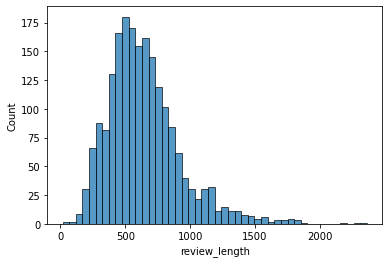

In [32]:
sns.histplot(data = df2, x = df2['review_length'])

### The histogram of review lengths is shown as above

## vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.2

In [33]:
df2

,0,class,number of unique words,review_length
cv000_29590.txt,"[[66, 3436, 31, 344, 1573, 32, 90, 1069, 4, 61...",1,411,679
cv001_18431.txt,"[[149, 141, 3, 97, 2, 28, 200, 256, 31, 2, 157...",1,311,650
cv002_15918.txt,"[[715, 287, 4181, 376, 10591, 155, 59, 9, 1168...",1,243,416
cv003_11664.txt,"[[2677, 6, 2, 1520, 15, 8, 5604, 164, 565, 145...",1,496,997
cv004_11636.txt,"[[5346, 6, 2, 207, 38, 112, 1, 835, 2680, 4, 2...",1,341,644
...,...,...,...,...
cv995_23113.txt,"[[1779, 43, 2, 11995, 33645, 7, 1, 4812, 2215,...",0,575,1366
cv996_12447.txt,"[[22, 141, 1, 7222, 4, 1, 32790, 4, 1323, 297,...",0,507,1009
cv997_5152.txt,"[[32769, 11, 1, 14410, 3603, 4, 107, 8, 628, 1...",0,236,396
cv998_15691.txt,"[[3, 141, 1, 15910, 1289, 1324, 424, 4, 1242, ...",0,281,521


### The output result shown as above are the words common use for each txt files.

### The output result shown as above are the tokenize result for each files.

## viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [34]:
import random

In [35]:
df3 = pd.DataFrame()
df3 = pd.concat([df,df1])

In [36]:
L = np.percentile(df3['review_length'].to_numpy(),70)

In [37]:
L

737.0

### The length of L is 737

## ix. Truncate reviews longer than L words and zeropad reviews shorter than L so that all texts (= data points) are of length L.

In [38]:
for i, file in enumerate(df3.index):
    df3[0][i] = [x for l in df3[0][i] for x in l]

<ipython-input-38-ebdbb47cba09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[0][i] = [x for l in df3[0][i] for x in l]


In [39]:
df3

,0,class,number of unique words,review_length
cv000_29590.txt,"[66, 3436, 31, 344, 1573, 32, 90, 1069, 4, 616...",1,411,679
cv001_18431.txt,"[149, 141, 3, 97, 2, 28, 200, 256, 31, 2, 1574...",1,311,650
cv002_15918.txt,"[715, 287, 4181, 376, 10591, 155, 59, 9, 1168,...",1,243,416
cv003_11664.txt,"[2677, 6, 2, 1520, 15, 8, 5604, 164, 565, 145,...",1,496,997
cv004_11636.txt,"[5346, 6, 2, 207, 38, 112, 1, 835, 2680, 4, 24...",1,341,644
...,...,...,...,...
cv995_23113.txt,"[1779, 43, 2, 11995, 33645, 7, 1, 4812, 2215, ...",0,575,1366
cv996_12447.txt,"[22, 141, 1, 7222, 4, 1, 32790, 4, 1323, 297, ...",0,507,1009
cv997_5152.txt,"[32769, 11, 1, 14410, 3603, 4, 107, 8, 628, 11...",0,236,396
cv998_15691.txt,"[3, 141, 1, 15910, 1289, 1324, 424, 4, 1242, 3...",0,281,521


In [40]:
df4 = df3.copy()

In [41]:
tt = pad_sequences(df4[0], maxlen = int(L), padding = 'post')

In [42]:
for i in list(range(0,len(df4),1)):
    df4[0][i] = tt[i]

<ipython-input-42-7ab0f01bea86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[0][i] = tt[i]


In [43]:
df4

,0,class,number of unique words,review_length
cv000_29590.txt,"[66, 3436, 31, 344, 1573, 32, 90, 1069, 4, 616...",1,411,679
cv001_18431.txt,"[149, 141, 3, 97, 2, 28, 200, 256, 31, 2, 1574...",1,311,650
cv002_15918.txt,"[715, 287, 4181, 376, 10591, 155, 59, 9, 1168,...",1,243,416
cv003_11664.txt,"[1418, 4372, 2476, 8615, 115, 261, 5, 2604, 16...",1,496,997
cv004_11636.txt,"[5346, 6, 2, 207, 38, 112, 1, 835, 2680, 4, 24...",1,341,644
...,...,...,...,...
cv995_23113.txt,"[1779, 43, 2, 11995, 33645, 7, 1, 4812, 2215, ...",0,575,1366
cv996_12447.txt,"[22, 141, 1, 7222, 4, 1, 32790, 4, 1323, 297, ...",0,507,1009
cv997_5152.txt,"[32769, 11, 1, 14410, 3603, 4, 107, 8, 628, 11...",0,236,396
cv998_15691.txt,"[3, 141, 1, 15910, 1289, 1324, 424, 4, 1242, 3...",0,281,521


### The truncate result is shown as above where I put them in the dataframe

In [44]:
train = pd.DataFrame()
train = pd.concat([train, df4[0:700]])
train = pd.concat([train, df4[1000:1700]])
test = pd.DataFrame()
test = pd.concat([test, df4[700:1000]])
test = pd.concat([test, df4[1700:2000]])

In [45]:
train

,0,class,number of unique words,review_length
cv000_29590.txt,"[66, 3436, 31, 344, 1573, 32, 90, 1069, 4, 616...",1,411,679
cv001_18431.txt,"[149, 141, 3, 97, 2, 28, 200, 256, 31, 2, 1574...",1,311,650
cv002_15918.txt,"[715, 287, 4181, 376, 10591, 155, 59, 9, 1168,...",1,243,416
cv003_11664.txt,"[1418, 4372, 2476, 8615, 115, 261, 5, 2604, 16...",1,496,997
cv004_11636.txt,"[5346, 6, 2, 207, 38, 112, 1, 835, 2680, 4, 24...",1,341,644
...,...,...,...,...
cv695_22268.txt,"[21603, 526, 1, 1477, 768, 24, 1636, 198, 186,...",0,328,594
cv696_29619.txt,"[1823, 4, 7043, 1201, 18, 32, 151, 12, 1, 15, ...",0,470,751
cv697_12106.txt,"[384, 21, 387, 1028, 38622, 3, 196, 9049, 353,...",0,355,628
cv698_16930.txt,"[25, 4, 106, 617, 894, 107, 6, 2451, 1155, 393...",0,343,652


In [46]:
tt

array([[   66,  3436,    31, ...,     0,     0,     0],
       [  149,   141,     3, ...,     0,     0,     0],
       [  715,   287,  4181, ...,     0,     0,     0],
       ...,
       [32769,    11,     1, ...,     0,     0,     0],
       [    3,   141,     1, ...,     0,     0,     0],
       [ 3538,   192,   455, ...,     0,     0,     0]], dtype=int32)

# (c) Word Embeddings

## i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. 
## These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” 

## We would like to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.5 
If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × 500 matrix.


In [47]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten

In [48]:
tt = np.where(tt > 5000, 0, tt)

In [49]:
tt1 = pd.DataFrame(tt)

In [50]:
model = Sequential()

In [51]:
model.add(Embedding(5001, 32, input_length = int(L)))
model.compile('rmsprop', 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
Total params: 160,032
Trainable params: 160,032
Non-trainable params: 0
_________________________________________________________________


In [52]:
output = model.predict(tt1)

In [53]:
output

array([[[ 0.02855923,  0.0262524 , -0.04226223, ..., -0.03453847,
          0.03241756, -0.01394301],
        [ 0.0364988 ,  0.01446814, -0.03312489, ...,  0.01293173,
         -0.02582396, -0.02356063],
        [ 0.01260618, -0.0079837 ,  0.03102135, ..., -0.01577402,
          0.04753652,  0.03136572],
        ...,
        [-0.04918926, -0.00057494,  0.03378801, ...,  0.03782611,
         -0.00438098,  0.00186931],
        [-0.04918926, -0.00057494,  0.03378801, ...,  0.03782611,
         -0.00438098,  0.00186931],
        [-0.04918926, -0.00057494,  0.03378801, ...,  0.03782611,
         -0.00438098,  0.00186931]],

       [[ 0.01369215,  0.03450667, -0.03989429, ..., -0.01602808,
          0.04565407, -0.01769295],
        [-0.01617713,  0.04931674,  0.04405883, ...,  0.03232816,
          0.03992692,  0.04671763],
        [ 0.01539748, -0.02948974,  0.04318077, ..., -0.00331772,
         -0.01753768, -0.01292195],
        ...,
        [-0.04918926, -0.00057494,  0.03378801, ...,  

## ii. Flatten the matrix of each document to a vector.

In [54]:
model.add(Embedding(5001, 32, input_length = int(L)))
model.add(Flatten())
model.compile('rmsprop', 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 embedding_1 (Embedding)     (None, 737, 32, 32)       160032    
                                                                 
 flatten (Flatten)           (None, 754688)            0         
                                                                 
Total params: 320,064
Trainable params: 320,064
Non-trainable params: 0
_________________________________________________________________


In [55]:
output1 = model.predict(tt1)

In [56]:
output1

array([[-0.03345566, -0.04930478,  0.02195961, ..., -0.02780213,
        -0.03213926,  0.02080989],
       [-0.03345566, -0.04930478,  0.02195961, ..., -0.02780213,
        -0.03213926,  0.02080989],
       [-0.03345566, -0.04930478,  0.02195961, ..., -0.02780213,
        -0.03213926,  0.02080989],
       ...,
       [-0.03345566, -0.04930478,  0.02195961, ..., -0.02780213,
        -0.03213926,  0.02080989],
       [-0.03345566, -0.04930478,  0.02195961, ..., -0.02780213,
        -0.03213926,  0.02080989],
       [-0.03345566, -0.04930478,  0.02195961, ..., -0.02780213,
        -0.03213926,  0.02080989]], dtype=float32)

In [57]:
tt1['class'] = df3['class'].tolist()

In [58]:
train = pd.concat([tt1[0:700], tt1[1000:1700]])
test = pd.concat([tt1[700:1000], tt1[1700:2000]])

In [59]:
x_train = train.drop(columns = 'class')
y_train = train['class']
x_test = test.drop(columns = 'class')
y_test = test['class']

In [60]:
x_test = x_test.astype(int)

In [61]:
y_test = y_test.astype(int)

In [62]:
x_train = x_train.astype(int)

In [63]:
x_train.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
732    int64
733    int64
734    int64
735    int64
736    int64
Length: 737, dtype: object

In [64]:
type(x_train)

pandas.core.frame.DataFrame

In [65]:
y_train = y_train.astype(int)

In [66]:
y_train.dtypes

dtype('int64')

# (d) Multi-Layer Perceptron

## i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [67]:
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import LSTM

In [68]:
model = Sequential()
model.add(Embedding(5001, 32, input_length = int(L)))
model.add(Flatten())

model.add(layers.Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 737, 32)           160032    
                                                                 
 flatten_1 (Flatten)         (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [69]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics = 'accuracy')

In [70]:
model.fit(x_train, y_train, epochs = 2, batch_size = 10)

Epoch 1/2
140/140 [==============================] - 2s 5ms/step - loss: 0.6993 - accuracy: 0.4957
Epoch 2/2
140/140 [==============================] - 1s 5ms/step - loss: 0.6598 - accuracy: 0.5950


## ii. Report the train and test accuracies of this model.

In [71]:
loss, accuracy = model.evaluate(x_train, y_train, verbose = 3)
accuracy

0.8178571462631226

In [72]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 3)
accuracy

0.5766666531562805

### The accuracy for train set is about 0.6642857193946838 and for test set is about 0.5083333253860474

# (e) One-Dimensional Convolutional Neural Network:
# Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

## i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.


In [73]:
model = Sequential()
model.add(Embedding(5001, 32, input_length = int(L)))
model.add(layers.Conv1D(32, 3))
model.add(layers.MaxPooling1D(pool_size = 1, strides = 2))
model.add(Flatten())
model.add(layers.Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 737, 32)           160032    
                                                                 
 conv1d (Conv1D)             (None, 735, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 368, 32)          0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 11776)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                588850    
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

In [74]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics = 'accuracy')

In [75]:
model.fit(x_train, y_train, epochs = 2, batch_size = 10)


Epoch 1/2
140/140 [==============================] - 2s 7ms/step - loss: 0.6952 - accuracy: 0.5236
Epoch 2/2
140/140 [==============================] - 1s 7ms/step - loss: 0.6747 - accuracy: 0.5807


## ii. Report the train and test accuracies of this model.

In [76]:
loss, accuracy = model.evaluate(x_train, y_train, verbose = 3)
accuracy

0.7507143020629883

In [77]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 3)
accuracy

0.5616666674613953

### The accuracy for train set is about 0.8007143139839172 and for test set is about 0.5416666865348816

# (f) Long Short-Term Memory Recurrent Neural Network:
# The structure of the LSTM we are going to use is shown in the following figure.


## i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [78]:
model = Sequential()
model.add(Embedding(5001, 32, input_length = int(L)))
model.add(LSTM(units = 32))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 737, 32)           160032    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 177,057
Trainable params: 177,057
Non-tr

In [79]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics = 'accuracy')

In [80]:
model.fit(x_train, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
140/140 [==============================] - 18s 119ms/step - loss: 0.6897 - accuracy: 0.5221
Epoch 2/20
140/140 [==============================] - 17s 120ms/step - loss: 0.6754 - accuracy: 0.5721
Epoch 3/20
140/140 [==============================] - 17s 123ms/step - loss: 0.6152 - accuracy: 0.6357
Epoch 4/20
140/140 [==============================] - 18s 129ms/step - loss: 0.5736 - accuracy: 0.6643
Epoch 5/20
140/140 [==============================] - 17s 121ms/step - loss: 0.5344 - accuracy: 0.6621
Epoch 6/20
140/140 [==============================] - 18s 130ms/step - loss: 0.4978 - accuracy: 0.6800
Epoch 7/20
140/140 [==============================] - 19s 136ms/step - loss: 0.4914 - accuracy: 0.6786
Epoch 8/20
140/140 [==============================] - 19s 137ms/step - loss: 0.4882 - accuracy: 0.6686
Epoch 9/20
140/140 [==============================] - 18s 129ms/step - loss: 0.4834 - accuracy: 0.6879
Epoch 10/20
140/140 [==============================] - 18s 125ms/step - l

## ii. Report the train and test accuracies of this model.

In [81]:
loss, accuracy = model.evaluate(x_train, y_train, verbose = 3)
accuracy

0.6800000071525574

In [82]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 3)
accuracy

0.5583333373069763

### The accuracy for train set is about 0.683571457862854 and for test set is about 0.5733333230018616


# Reference:

## https://stackoverflow.com/questions/3159155/how-to-remove-all-integer-values-from-a-list-in-python

## https://www.geeksforgeeks.org/how-to-read-multiple-text-files-from-folder-in-python/

## https://www.delftstack.com/howto/python/python-remove-punctuation-from-list/#:~:text=The%20fastest%20and%20the%20most,translate()%20function.

## unique count
## https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

## https://www.geeksforgeeks.org/python-count-occurrences-of-each-word-in-given-text-file-using-dictionary/